# Multiobjective optimization with Pareto front mapping

One way to do multiobjective optimization is with Pareto optimization, which explores the set of Pareto-efficient points. A point is Pareto-efficient if there are no other valid points that are better at every objective: it shows the "trade-off" between several objectives. 

In [1]:
%run -i prepare_re_env.py --db-type=temp

In [2]:
from blop import DOF, Objective, Agent
from blop.utils import functions
from blop.dofs import BrownianMotion

import numpy as np


def digestion(df):
    for index, entry in df.iterrows():
        x1, x2 = entry.x1, entry.x2

        df.loc[index, "f1"] = (x1 - 2) ** 2 + (x2 - 1) + 2
        df.loc[index, "f2"] = 9 * x1 - (x2 - 1) + 2
        df.loc[index, "c1"] = x1**2 + x2**2
        df.loc[index, "c2"] = x1 - 3 * x2 + 10

    return df


dofs = [
    DOF(name="x1", search_domain=(-20, 20)),
    DOF(name="x2", search_domain=(-20, 20)),
]


objectives = [
    Objective(name="f1", target="min"),
    Objective(name="f2", target="min"),
    Objective(name="c1", constraint=(-np.inf, 225)),
    Objective(name="c2", constraint=(-np.inf, 0)),
]

agent = Agent(
    dofs=dofs,
    objectives=objectives,
    digestion=digestion,
    db=db,
)

(uid,) = RE(agent.learn("qr", n=64))

2025-02-18 10:26:08.912 INFO: Executing plan <generator object Agent.learn at 0x7fb2c5c5fa10>
2025-02-18 10:26:08.913 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fb2cb46d940> from 'idle' -> 'running'




Transient Scan ID: 1     Time: 2025-02-18 10:26:08
Persistent Unique Scan ID: '7bdfc2f1-41bc-4a1e-85c1-d50246bc47c6'
New stream: 'primary'
+-----------+------------+------------+------------+
|   seq_num |       time |         x1 |         x2 |
+-----------+------------+------------+------------+
|         1 | 10:26:08.9 |     -4.702 |      0.066 |
|         2 | 10:26:08.9 |     -7.181 |     -0.641 |
|         3 | 10:26:08.9 |    -11.353 |     -1.894 |
|         4 | 10:26:08.9 |    -10.328 |      2.801 |
|         5 | 10:26:08.9 |     -6.135 |      4.050 |
|         6 | 10:26:08.9 |     -8.962 |      6.937 |
|         7 | 10:26:08.9 |     -2.009 |     11.275 |
|         8 | 10:26:08.9 |     -0.005 |      8.421 |
|         9 | 10:26:08.9 |      1.653 |      5.324 |
|        10 | 10:26:08.9 |      3.210 |      3.690 |
|        11 | 10:26:08.9 |      7.163 |      2.206 |
|        12 | 10:26:08.9 |      4.723 |     -1.631 |
|        13 | 10:26:09.0 |      6.158 |     -3.115 |
|        14

2025-02-18 10:26:09.639 INFO: Change state on <bluesky.run_engine.RunEngine object at 0x7fb2cb46d940> from 'running' -> 'idle'
2025-02-18 10:26:09.640 INFO: Cleaned up from plan <generator object Agent.learn at 0x7fb2c5c5fa10>


We can plot our fitness and constraint objectives to see their models:

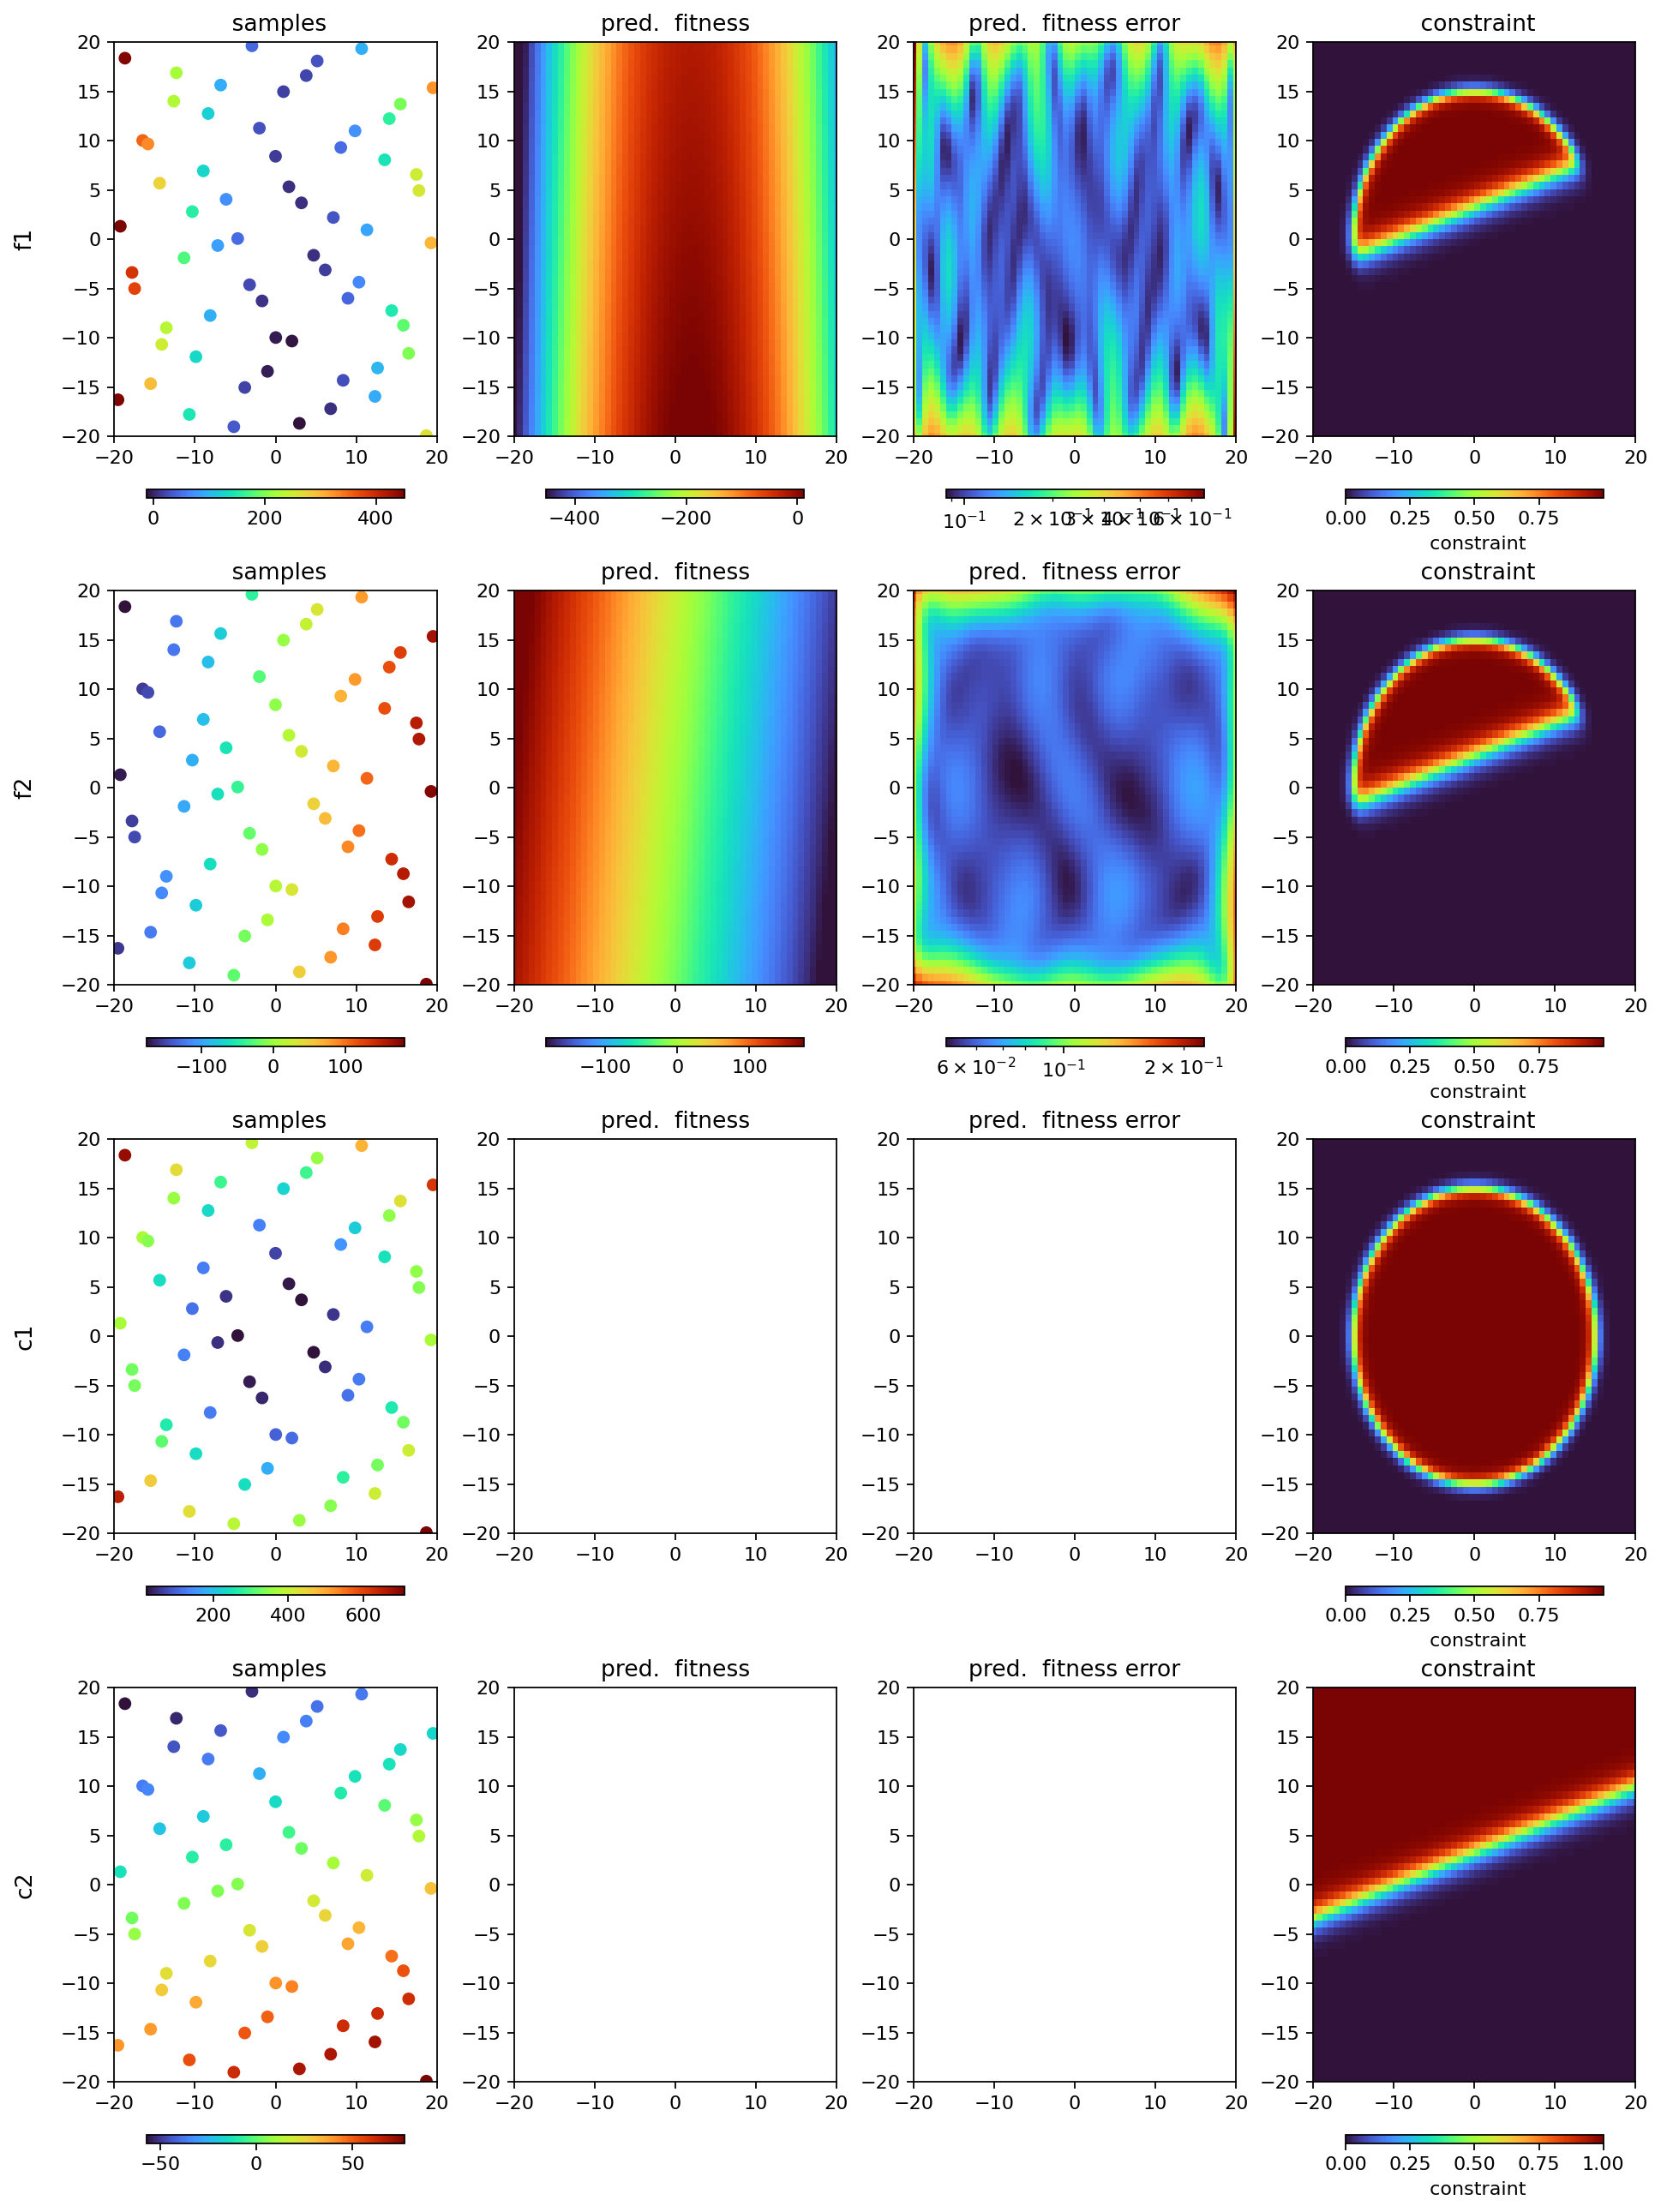

In [3]:
agent.plot_objectives()

We can plot the Pareto front (the set of all Pareto-efficient points), which shows the trade-off between the two fitnesses. The points in blue comprise the Pareto front, while the points in red are either not Pareto efficient or are invalidated by one of the constraints.

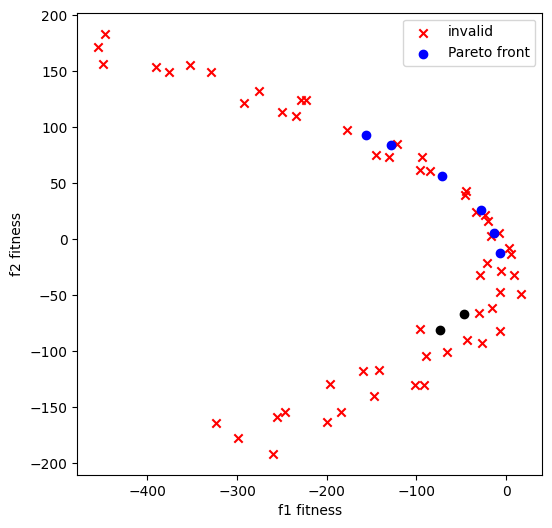

In [4]:
agent.plot_pareto_front()

We can explore the Pareto front by choosing a random point on the Pareto front and computing the expected improvement in the hypervolume of all fitness objectives with respect to that point (called the "reference point"). All this is done automatically with the `qnehvi` acquisition function:

In [5]:
# this is broken now but is fixed in the next PR
# RE(agent.learn("qnehvi", n=4))